# Why Am I Late: Traffic Indicators I-94

In this project I will explore the I-94 Interstate dataset. This dataset was compiled by John Hogue and it can be downloaded from <a href='https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume'>UCI Machine Learning Repository</a>. The data was recorded between Minneapolis and Saint Paul, and the recording station only recorded westbound traffic (cars moving from east to west). Henceforth, all analysis will be about the westbound traffic in the proximity of our recorded station. Further details about the dataset can be obtained from its <a href='https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume'>documentation</a>.

The  goal of this analysis is to determine a few indicators of heavy traffic on I-94. These can be weather type, time of the day, time of the week etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

traffic=pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The following observations can be made about this dataset:
<ul>
    <li>There are 48204 entries and 9 columns in this dataset.</li>
    <li>Amongst these 9 columns there are 4 string's, 3 floats, and 2 integers. </li>
    <li>There are no columns contianing null entries in this dataset.</li>
</ul>

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

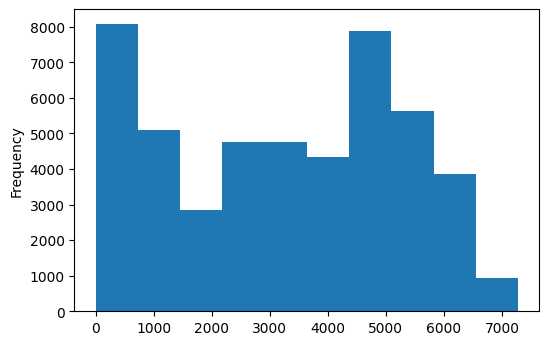

In [4]:
%matplotlib inline
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

It seems that:
<ul>
    <li>25% of the time the traffic volume crossing the recording station is 1193 - which is only possible at night or during an event such as road construction taking place on the Highway.</li>
    <li>75% of the time traffic is approximately 4 times more than 25% of the time. </li>
</ul>

Daytime and Nightime can have a significant impact on the traffic volume but some analysis is required to jump to quantitative conclusions

## Data Analysis

### Part one: Comparing Night Time and Day Time Data

In [5]:
#converting the datetime column to datetime from string.
traffic['date_time']=pd.to_datetime(traffic['date_time'])
day=traffic[(traffic['date_time'].dt.hour>=7)&(traffic['date_time'].dt.hour<19)]
night=traffic[(traffic['date_time'].dt.hour>=19) | (traffic['date_time'].dt.hour<7)]
print(night.shape)

(24327, 9)


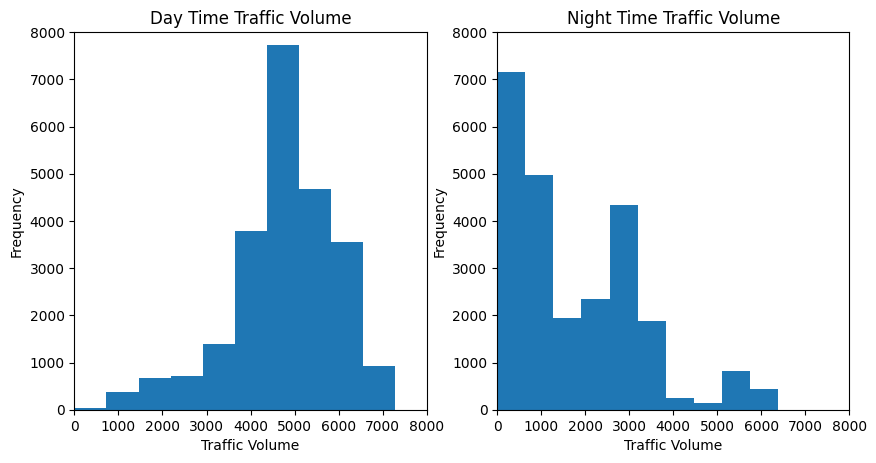

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Day Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Night Time Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim([0,8000])
plt.ylim([0,8000])
plt.show()

In [7]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [8]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

My observations:
<ul>
    <li>The day time traffic graph resembles a left skewed distribution because most of the values lie at the end of the distribution - 75% of the traffic volume is less than or equal to 5559. This means that there is heavy traffic 75% of the time. </li>.
    <li>The night time traffic graph resembles a right skewed distribution because most of the data lies at the start of the distribution - 75% of the traffic volume is less than or equal to 2819. Heavy traffic is only seen in the rest 25% of the night.</li>
</ul>

Since, we are looking for heavy traffic indicators and during the night time traffic is light, It would be best to proceed with the daytime data only.

## Time Indicators

Traffic never remains the same throughout the day. There might be more people on the road in a certain month or a certain day or a certain time of the year.

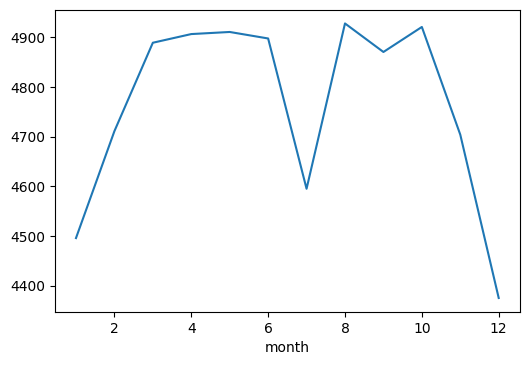

In [17]:
pd.set_option('mode.chained_assignment',None)
day['month']=day['date_time'].dt.month
by_month=day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

The traffic volume sees a steep increase from 4500 to 4890 in the first 3 months. After that it remains roughly constant for the next 2 months. In June the traffic volume sees a steep decline and falls to 4580 by early July. The traffic volume then shoots upwards and touches more than 4900 by the start of August. The traffic volume starts declining from the moddle of October and ends at 4400 by the end of November.

It seems that the traffic volume remains less during winters (November to February) but high during summers with one exception: July. The above analysis tells that the traffic volume fell from 4580 to 4890 by early July. So it is necessary to find out why it fell in July?

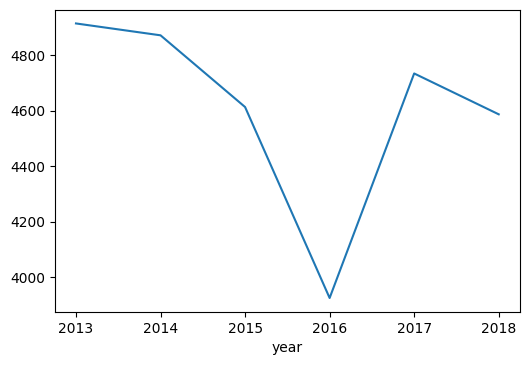

In [31]:
day['year']=day['date_time'].dt.year

only_july=day[day['month']==7]

by_year_july=only_july.groupby('year').mean()
by_year_july['traffic_volume'].plot.line()

The traffic volume in the month of July seems to be above 4600 from 2013 to 2018 except for 2016. This suggests that the dip in July can be due to an event occuring in 2016. After surfing the web it seems that road construction was the cause of such a dip in traffic volume - as is supported by this <a href=  'https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes'>article</a>

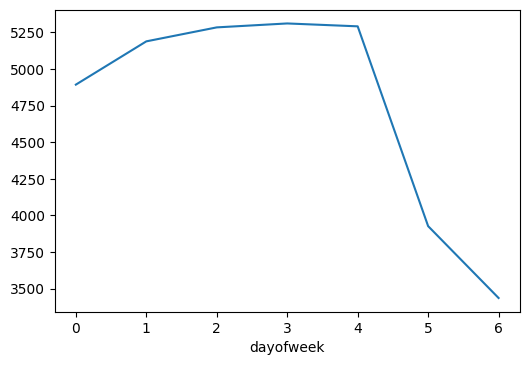

In [18]:
day['dayofweek']=day['date_time'].dt.dayofweek
by_dayofweek=day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic is high during business days, and low during the weekends.

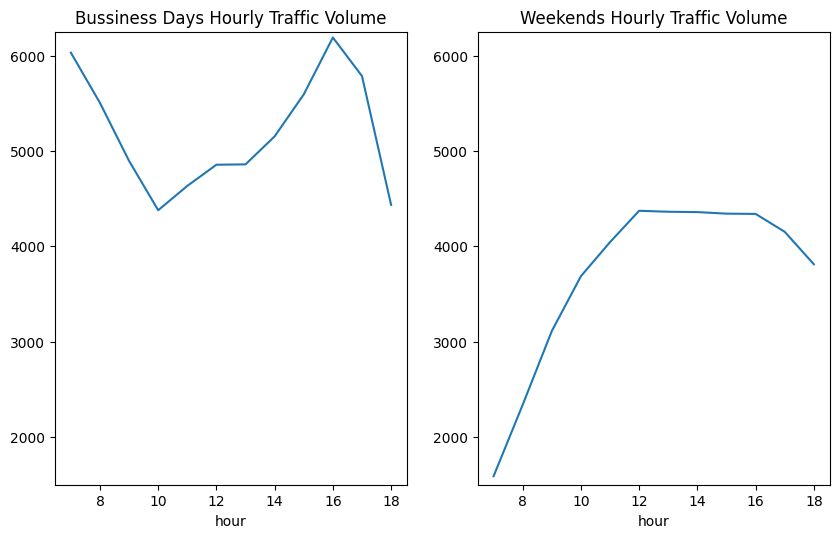

In [27]:
day['hour']=day['date_time'].dt.hour
business_days=day.copy()[day['dayofweek']<=4]
weekend=day.copy()[day['dayofweek']>=5]
by_hour_business=business_days.groupby('hour').mean()
by_hour_weekend=weekend.groupby('hour').mean()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Bussiness Days Hourly Traffic Volume')
plt.ylim([1500,6250])
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekends Hourly Traffic Volume')
plt.ylim([1500,6250])
plt.show()

During business days traffic volume falls from 6000 to around 4300 during the morining hours (8am - 10am) where as during the weekends the traffic volume starts to increase from around 1500 to around 3200 during the moring hours.

The traffic volume steadily increases from around 4300 at 10 am to more than 6000 at 4pm after which it sees a sharp decline to 4300 with in the next two hours. During the weekends the traffic volume increases to 4300 till 12pm, after this it remains constant till 4pm, and slowly falls to around 3700 with in the next two hours. Rush hours during business days are at 8 and 16.

We have analyzed traffic volume with respect to month, day, and hour. The findings have been summarized below:
<ul>
    <li>Traffic stays high during the summers, and low during the winters.</li>
    <li>Traffic is significantly higher during the business days than the weekends.</li>
    <li>Rush hours during business days are around 8am and 4pm.</li>
</ul>

## Weather indicators: Part one

Weather can be a possible indicator of traffic volume. Therefore, it is best to analyze traffic volume against all the weather related columns present in the dataset: temp, rain_1h,snow_1h,clouds_all

In [34]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
year             -0.003557
Name: traffic_volume, dtype: float64

Among the weather columns traffic volume has the highest correlation with temperature column, and the lowest correlation with snow_1h column.

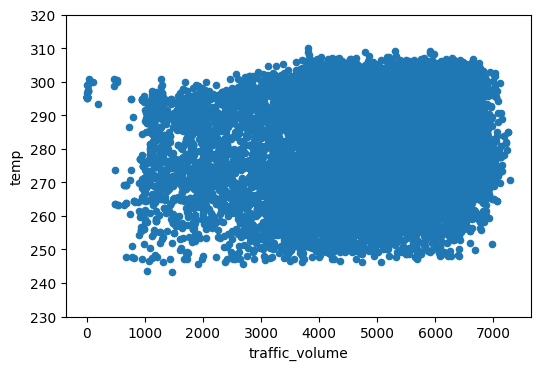

In [38]:
day.plot.scatter(x='traffic_volume',y='temp')
plt.ylim([230,320])
plt.show()

Temperature doesnot look like a solid indicator for heavy traffic therefore its best to move forward and analyze the weather_description, and weather_main columns.

### Analyzing Weather Types

Weather_main, and Weather_description are two categorical columns in our dataset that can help us figure out a possible heavy indicator of traffic.

In [39]:
day['weather_main'].value_counts()

Clouds          8702
Clear           5744
Rain            2841
Mist            2593
Snow            1454
Drizzle          883
Haze             834
Thunderstorm     451
Fog              362
Smoke             12
Squall             1
Name: weather_main, dtype: int64

Weather_main is a short description of the weather, and it has 11 unique entries.

In [40]:
day['weather_description'].value_counts()

sky is clear                           4892
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
Sky is Clear                            852
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain    

I found a certain problem with the above data. It has 'sky is clear' twice which can be a problem therefore it is best to fix it before procedding with our analysis.

In [47]:
weather_descriptions=day['weather_description'].value_counts().index
weather_des_dict={}
for weather in weather_descriptions:
    if weather=='sky is clear':
        weather_des_dict[weather]='sky is clear'
    elif weather=='Sky is Clear':
        weather_des_dict[weather]='sky is clear'
    else:
        weather_des_dict[weather]=weather
        
day['weather_description']=day['weather_description'].map(weather_des_dict)


In [48]:
day['weather_description'].value_counts()

sky is clear                           5744
broken clouds                          2793
mist                                   2593
overcast clouds                        2585
scattered clouds                       2181
light rain                             1707
few clouds                             1143
light snow                              978
haze                                    834
moderate rain                           785
light intensity drizzle                 573
fog                                     362
heavy snow                              320
proximity thunderstorm                  303
drizzle                                 278
heavy intensity rain                    219
snow                                    137
proximity shower rain                   111
thunderstorm                             48
heavy intensity drizzle                  29
thunderstorm with heavy rain             25
thunderstorm with light rain             23
thunderstorm with rain          

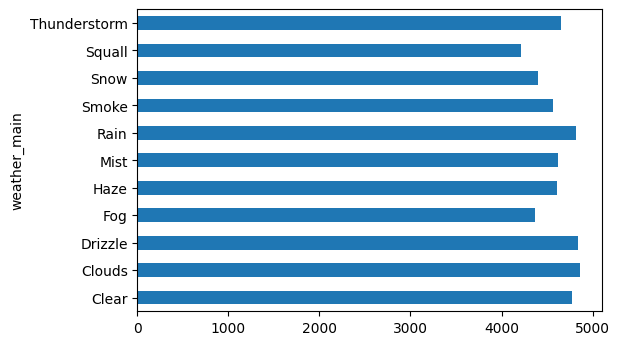

In [50]:
by_weather_main=day.groupby('weather_main').mean()
by_weather_description=day.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is not any traffic volume exceeding 5000 cars, therefore we cannot identify a heavy traffic indicator from the above plot. Let's analyze weather_description colume.

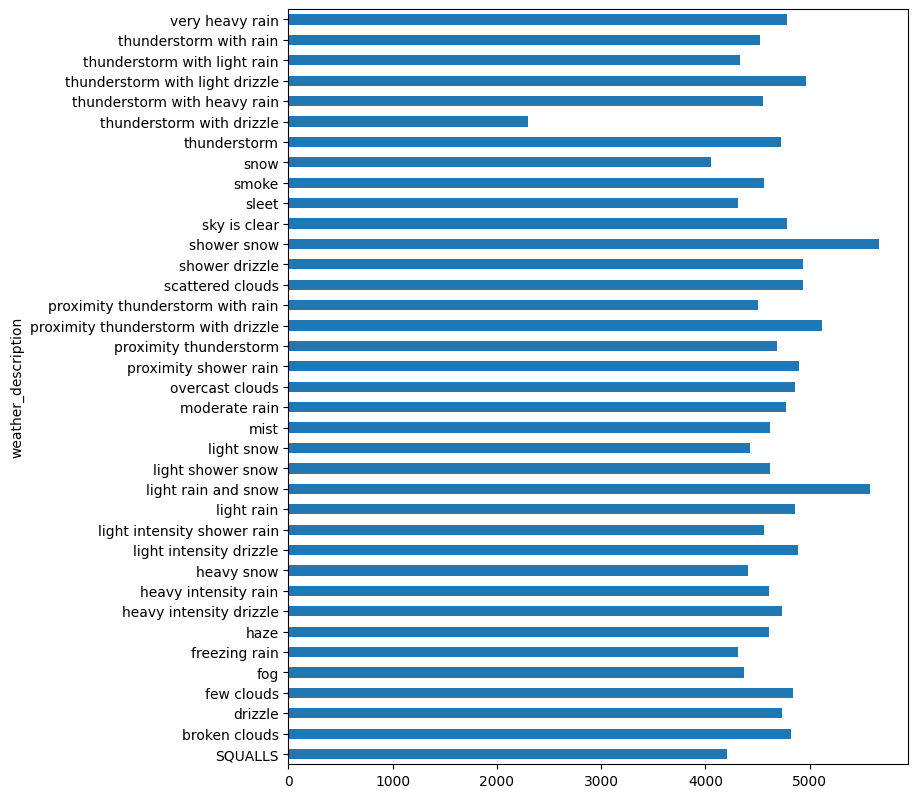

In [53]:
plt.figure(figsize=(8,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

The following three weather descriptions have traffic volume greater than 5000 cars and might be heavy traffic indicators:
<ul>
    <li>light rain and snow</li>
    <li>shower snow</li>
    <li>proximity thunderstorm with drizzle</li>
</ul>

## Conclusion

After Analysis of the westbound traffic on I-94 we have two types of heavy traffic indicators: time and weather:

<b>Time Indicator:</b>
<ul>
    <li>The traffic volume is more during the summers (March-October) and less during the winters(November-February)</li>
    <li>The traffic volume is more during business days and less during the weekends</li>
    <li>Rush hours during business days are 8am and 4pm.</li>
</ul>
<b>Weather Indicator</b>
<ul>
    <li>light rain and snow</li>
    <li>shower snow</li>
    <li>proximity thunderstorm and drizzle</li>
</ul>